# GEOG5995M Fiona Hallam Final Assignment

Student ID number: 201786200

Using the CDRC's Access to Health Assets and Hazards multi-dimensional index, this project aims to assist York's local authorities in measuring how ‘healthy’ York neighbourhoods are. This project specifically aims to answer "what key variable should local authorities in York use to measure and monitor air quality and how does York compare to the rest of the UK?". Nitrogen dioxide was identified as they key variable for York's local authorities to monitor whilst it was found that York mostly had medium no2 levels compared to the rest of the UK. The code can be adapted to analyse different dimensions within the AHAH index or applied to different local areas.


In [42]:
# Read in required packages

In [43]:
# import pandas package and rename to pd
# import numpy package and rename to np
# import geopandas and rename to gpd
# import matplotlib.pyplot and rename to plt
# import seaborn and rename to sns

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Create dataframe called 'ahah' by reading in the csv file named 'AHAH_V3_0.csv'
ahah = pd.read_csv('/Users/user/Documents/Manchester University/GEOG5995M_Programming_For_Social_Sciences/Assignment/2.Final_Project/AHAH_V3_0.csv')

In [45]:
# Check the data. We have 58 columns comprised of one 2011 LSOA identification column and the remaining AHAH dimension variable columns
# We can see from the non-null count that we have no missing data as each column has the correct number of cells matching the 41729 entries
# We also are able to see what data type each column is
ahah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41729 entries, 0 to 41728
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lsoa11        41729 non-null  object 
 1   ah3gp         41729 non-null  float64
 2   ah3dent       41729 non-null  float64
 3   ah3phar       41729 non-null  float64
 4   ah3hosp       41729 non-null  float64
 5   ah3blue       41729 non-null  float64
 6   ah3gpas       41729 non-null  float64
 7   ah3ffood      41729 non-null  float64
 8   ah3gamb       41729 non-null  float64
 9   ah3leis       41729 non-null  float64
 10  ah3pubs       41729 non-null  float64
 11  ah3tob        41729 non-null  float64
 12  ah3no2        41729 non-null  float64
 13  ah3so2        41729 non-null  float64
 14  ah3pm10       41729 non-null  float64
 15  ah3gp_rnk     41729 non-null  int64  
 16  ah3dent_rnk   41729 non-null  int64  
 17  ah3phar_rnk   41729 non-null  int64  
 18  ah3hosp_rnk   41729 non-nu

In [46]:
# We do not need all 58 dimension columns so we will create a new dataframe containing the dimensions we are most interested in
# We will keep the lsoa11 column as the common merger/unique identification label and the most relevant dimensions related to air quality
# Thus Health (ah3h), green/bluespace (ah3g), air quality (ah3e), AHAH index scores (ah3ahah) will remain
# We will also keep mean nitrogen dioxide (ah3no2), particulate matter (ah3pm10) & sulphur dioxide scores (ah3so2)
ahah2 = ahah[['lsoa11','ah3e','ah3h','ah3g','ah3ahah','ah3no2','ah3pm10','ah3so2']].copy()

In [47]:
ahah2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41729 entries, 0 to 41728
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lsoa11   41729 non-null  object 
 1   ah3e     41729 non-null  float64
 2   ah3h     41729 non-null  float64
 3   ah3g     41729 non-null  float64
 4   ah3ahah  41729 non-null  float64
 5   ah3no2   41729 non-null  float64
 6   ah3pm10  41729 non-null  float64
 7   ah3so2   41729 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.5+ MB


In [48]:
# Now we will rename the columns to help with readability
ahah2.rename(columns={'ah3h': 'health_domain', 'ah3g': 'green/bluespace_score', 'ah3e' : 'air_quality_total_score', 'ah3ahah' : 'AHAH_index_score', 'ah3no2' : 'mean_no2', 'ah3pm10' : 'mean_pm', 'ah3so2' : 'mean_so2'}, inplace=True)

In [49]:
# Check it worked
ahah2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41729 entries, 0 to 41728
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lsoa11                   41729 non-null  object 
 1   air_quality_total_score  41729 non-null  float64
 2   health_domain            41729 non-null  float64
 3   green/bluespace_score    41729 non-null  float64
 4   AHAH_index_score         41729 non-null  float64
 5   mean_no2                 41729 non-null  float64
 6   mean_pm                  41729 non-null  float64
 7   mean_so2                 41729 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.5+ MB


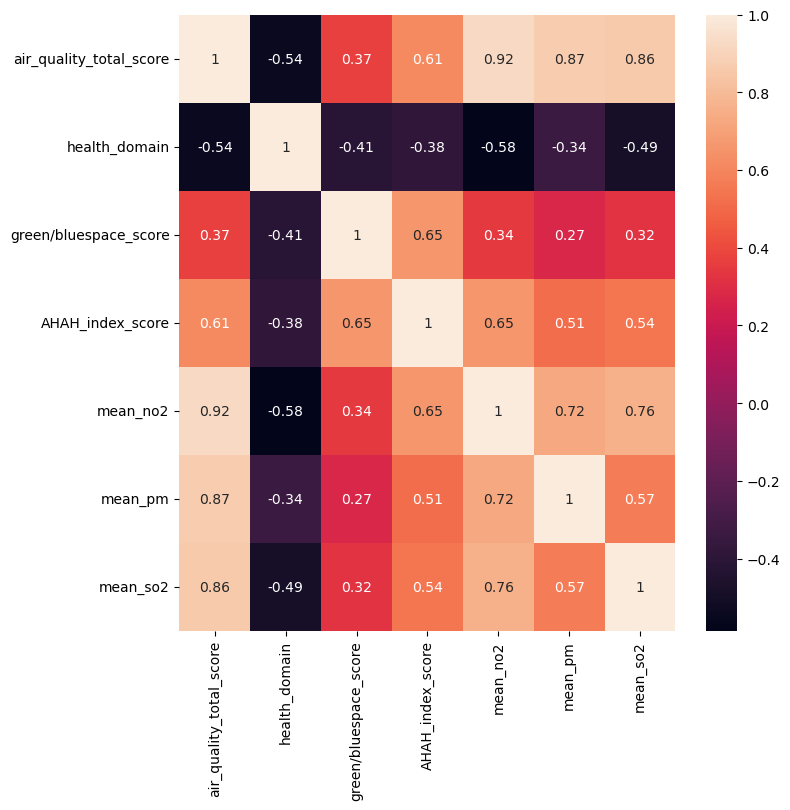

In [50]:
# From a public health perspective, it would be useful to understand what dimensions impact air quality the most
# To quickly understand which dimensions have the largest correlation with air quality we can plot a heatmap of the correlations

# First set figure size
plt.figure(figsize=(8,8))

# Plot heatmap of the correlation matrix and annotate the cells with the correlation value 
sns.heatmap(ahah2.select_dtypes(include=np.number).corr(), annot=True);

# The top dimensions correlated with air quality include mean nitrogren dioxide (0.92), particulate matter (0.87) & sulphur dioxide (0.86)

In [51]:
# We want to understand what high and low levels of these three negating air quality dimensions are
# Create a table of the summary statistics
ahah2.describe()

,air_quality_total_score,health_domain,green/bluespace_score,AHAH_index_score,mean_no2,mean_pm,mean_so2
count,41729.000000,41729.000000,41729.000000,41729.000000,41729.000000,41729.000000,41729.000000
mean,-0.000093,-0.000339,-0.000853,21.690566,13.277486,13.582856,1.382154
std,0.903603,0.843373,0.635941,8.990898,6.371053,3.197949,0.598415
min,-3.673556,-3.379653,-3.484349,2.038381,1.327980,4.498738,0.193004
25%,-0.567288,-0.559559,-0.423052,15.328109,8.754113,11.197578,0.948024
50%,0.021504,-0.018986,0.028231,19.835269,12.411780,13.885797,1.281220
75%,0.584801,0.512488,0.450462,26.021198,16.717645,15.913433,1.766603
max,3.063291,3.582578,2.244929,73.545012,44.202850,21.825480,6.738594


In [52]:
# Now add another column which classifies whether the nitrogen dioxide levels are low, medium or high based off the summary statistics
for index, row in ahah2.iterrows():
    if (row['mean_no2']<8.75):
        print('low')
    elif (row['mean_no2']>16.71):
        print('high')
    else:
        print('med')

high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high


The mean nitrogen dioxide level in our summary statistics aligns with government recommendations so we can use this in our investigation <a href="#ref1">[6]</a>

In [53]:
# Now we want to add another column which classifies whether the nitrous dioxide levels are low, medium or high
# We set a condition based off the summary statistics table which classifies each level of NO2

conditions = [
    (ahah2['mean_no2']<8.75),
    (ahah2['mean_no2']>8.75) & (ahah2['mean_no2']<16.71),
    (ahah2['mean_no2']>16.71)]

# Label each level clearly
values = ['low_no2','med_no2','high_no2']

# Add a column onto our existing table comprised of our classified NO2 levels
ahah2['no2_level'] = np.select(conditions,values)

# Check it worked
ahah2.head()

,lsoa11,air_quality_total_score,health_domain,green/bluespace_score,AHAH_index_score,mean_no2,mean_pm,mean_so2,no2_level
0,E01000001,2.731233,-2.094345,1.181443,64.766722,42.349097,20.318923,3.239346,high_no2
1,E01000002,2.710356,-1.192991,1.411215,65.801756,41.422220,20.467185,3.155467,high_no2
2,E01000003,2.710356,-2.590539,1.074975,64.267360,41.422220,20.467185,3.155467,high_no2
3,E01000005,2.434318,-1.632323,1.369772,67.739216,39.634000,20.275245,2.978709,high_no2
4,E01000006,2.023191,-0.739518,0.256898,42.072046,31.198625,20.440190,2.266224,high_no2


In [54]:
# Read in a national LSOA data file so we can locate York area codes and merge our ahah2 dataframe
national = pd.read_csv('/Users/user/Documents/Manchester University/GEOG5995M_Programming_For_Social_Sciences/Assignment/2.Final_Project/LSOA_(2011)_to_LSOA_(2021)England_and_Wales.csv')

In [55]:
# Check the data, we will clean the columns in a few steps
national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35796 entries, 0 to 35795
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA11CD  35796 non-null  object
 1   LSOA11NM  35796 non-null  object
 2   LSOA21CD  35796 non-null  object
 3   LSOA21NM  35796 non-null  object
 4   CHGIND    35796 non-null  object
 5   LAD22CD   35796 non-null  object
 6   LAD22NM   35796 non-null  object
 7   LAD22NMW  1940 non-null   object
 8   ObjectId  35796 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


In [56]:
# Create a new dataframe called 'York' by reading in ONLY 'York' data from the national dataframe's 'LAD22NM' column
york = national[(national['LAD22NM'] == 'York')]

In [57]:
# Confirm it worked by checking that the first and last 5 rows in the dataframe include 'York' in the LAD22NM column
york.head()

,LSOA11CD,LSOA11NM,LSOA21CD,LSOA21NM,CHGIND,LAD22CD,LAD22NM,LAD22NMW,ObjectId
12408,E01013428,York 006A,E01013428,York 006A,U,E06000014,York,NaN,12409
12415,E01013429,York 006B,E01013429,York 006B,U,E06000014,York,NaN,12416
12421,E01013430,York 006C,E01013430,York 006C,U,E06000014,York,NaN,12422
12425,E01013431,York 006D,E01013431,York 006D,U,E06000014,York,NaN,12426
12427,E01013432,York 007C,E01013432,York 007C,U,E06000014,York,NaN,12428


In [58]:
york.tail()

,LSOA11CD,LSOA11NM,LSOA21CD,LSOA21NM,CHGIND,LAD22CD,LAD22NM,LAD22NMW,ObjectId
31394,E01033068,York 013G,E01033068,York 013G,U,E06000014,York,NaN,31395
31404,E01033069,York 013H,E01033069,York 013H,U,E06000014,York,NaN,31405
31414,E01033070,York 013I,E01033070,York 013I,U,E06000014,York,NaN,31415
33146,E01013365,York 023A,E01034761,York 023D,S,E06000014,York,NaN,33147
33147,E01013365,York 023A,E01034762,York 023E,S,E06000014,York,NaN,33148


In [59]:
# The number of entries has reduced to only cover the York area as we would expect
# Now to clean up the table, first look at the columns and then we can remove any not needed
york.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 12408 to 33147
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA11CD  121 non-null    object
 1   LSOA11NM  121 non-null    object
 2   LSOA21CD  121 non-null    object
 3   LSOA21NM  121 non-null    object
 4   CHGIND    121 non-null    object
 5   LAD22CD   121 non-null    object
 6   LAD22NM   121 non-null    object
 7   LAD22NMW  0 non-null      object
 8   ObjectId  121 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 9.5+ KB


In [60]:
# Remove columns containing 2021 & 2022 data and the LAD22NMW column as this does not contain any data
# We keep the 2011 data to match with our 2011 AHAH data
york2 = york.drop(['LSOA21CD','LSOA21NM','LAD22CD','LAD22NM','LAD22NMW'], axis = 1)

In [61]:
# Check it worked - we removed 5 columns so the total has gone down from 9 to 4
york2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 12408 to 33147
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA11CD  121 non-null    object
 1   LSOA11NM  121 non-null    object
 2   CHGIND    121 non-null    object
 3   ObjectId  121 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.7+ KB


In [62]:
# Now merge dataframes by joining the ahah2 dataframe onto york2 (york2 being left) using 2011 LSOA code as merger
# We should have our 4 columns from the york2 dataframe combined with the 9 columns from the ahah2 dataframe
yorkahah = york2.merge(ahah2, left_on='LSOA11CD', right_on='lsoa11')

In [63]:
# Check the table matches our expectations of 13 columns
yorkahah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LSOA11CD                 121 non-null    object 
 1   LSOA11NM                 121 non-null    object 
 2   CHGIND                   121 non-null    object 
 3   ObjectId                 121 non-null    int64  
 4   lsoa11                   121 non-null    object 
 5   air_quality_total_score  121 non-null    float64
 6   health_domain            121 non-null    float64
 7   green/bluespace_score    121 non-null    float64
 8   AHAH_index_score         121 non-null    float64
 9   mean_no2                 121 non-null    float64
 10  mean_pm                  121 non-null    float64
 11  mean_so2                 121 non-null    float64
 12  no2_level                121 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 12.4+ KB


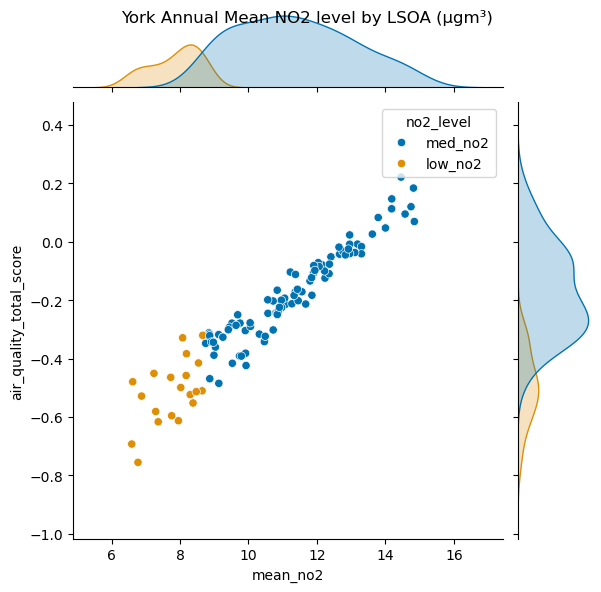

In [77]:
# Now we can plot the relationship between York's air quality total score and it's NO2 level
# Create a jointplot with x = mean_no2, y = air_quality_total_score, colour it based on our NO2 classification column
# Make the chart accessible by using a colour-blind palette
sns.jointplot(x='mean_no2',y='air_quality_total_score', hue='no2_level', palette='colorblind', data=yorkahah)

# Set an informative title for the subplot
plt.suptitle("York Annual Mean NO2 level by LSOA (μgm³)"); 

To interpret the above subplot, larger scores represent areas that have poorer health-related environments (AKA poorer air quality) <a href="#ref1">[1]</a>. There is a clear positive correlation between the dependent (air quality) and independent variable (nitrogen dioxide) meaning as the air quality score increases, reflecting poorer air quality, the mean nitrogen dioxide levels increase. It can be noted that York mostly has medium nitrogen dioxide levels and there is a distinct absence of high nitrogen dioxide scores.

In [65]:
# Now to plot the no2 levels geographically we read in a spatial data file
yorkspatial = gpd.read_file("/Users/user/Documents/Manchester University/GEOG5995M_Programming_For_Social_Sciences/Assignment/2.Final_Project/england_lsoa_2011.shp")

In [66]:
# Check the data file matches the entries we need
# 120 entries in yorkspatial closely matches the 121 entries from our yorkahah dataframe
# The discrepancy can be attributed to changing/differing LSOA boundaries, but as it is almost perfect match we can continue
yorkspatial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   label     120 non-null    object  
 1   name      120 non-null    object  
 2   code      120 non-null    object  
 3   geometry  120 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 3.9+ KB


In [67]:
# Check which column we can use to merge our yorkahah dataframe. 'Code' in york spatial matches our 'LSOA11CD' column in yorkahah
yorkspatial.head()

,label,name,code,geometry
0,E06000014E02002789E01013444,York 018C,E01013444,"POLYGON ((456431.118 451426.383, 456433.619 45..."
1,E06000014E02002787E01013445,York 016F,E01013445,"POLYGON ((457246.398 451354.223, 457247.750 45..."
2,E06000014E02002789E01013446,York 018D,E01013446,"POLYGON ((456752.731 450572.604, 456755.249 45..."
3,E06000014E02002789E01013447,York 018E,E01013447,"POLYGON ((457154.360 450889.758, 457158.188 45..."
4,E06000014E02002789E01013448,York 018F,E01013448,"POLYGON ((457428.315 450024.910, 457415.903 45..."


In [68]:
# Merge spatial data into yorkahah dataframe by matching 'LSOA11CD' column to 'code' column
spatialyorkahah = yorkspatial.merge(yorkahah, left_on='code', right_on='LSOA11CD')

In [69]:
# Check dataframe contains our 9 ahah dimension columns, our 4 York LSOA columns and our 4 geometric polygon data columns (17 total)
# Check there are no missing values within the columns by ensuring each column has the total 121 entries
# Check the data types all align with expectations
spatialyorkahah.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   label                    121 non-null    object  
 1   name                     121 non-null    object  
 2   code                     121 non-null    object  
 3   geometry                 121 non-null    geometry
 4   LSOA11CD                 121 non-null    object  
 5   LSOA11NM                 121 non-null    object  
 6   CHGIND                   121 non-null    object  
 7   ObjectId                 121 non-null    int64   
 8   lsoa11                   121 non-null    object  
 9   air_quality_total_score  121 non-null    float64 
 10  health_domain            121 non-null    float64 
 11  green/bluespace_score    121 non-null    float64 
 12  AHAH_index_score         121 non-null    float64 
 13  mean_no2                 121 non-null    float64 
 14  me

In [70]:
# Another check of the first 5 rows
spatialyorkahah.head()

,label,name,code,geometry,LSOA11CD,LSOA11NM,CHGIND,ObjectId,lsoa11,air_quality_total_score,health_domain,green/bluespace_score,AHAH_index_score,mean_no2,mean_pm,mean_so2,no2_level
0,E06000014E02002789E01013444,York 018C,E01013444,"POLYGON ((456431.118 451426.383, 456433.619 45...",E01013444,York 018C,U,12555,E01013444,-0.328852,0.319657,0.637111,21.646630,8.077698,15.697440,0.915097,low_no2
1,E06000014E02002787E01013445,York 016F,E01013445,"POLYGON ((457246.398 451354.223, 457247.750 45...",E01013445,York 016F,U,12561,E01013445,-0.316144,-1.477549,0.496612,19.041844,8.862164,14.612853,1.012754,med_no2
2,E06000014E02002789E01013446,York 018D,E01013446,"POLYGON ((456752.731 450572.604, 456755.249 45...",E01013446,York 018D,U,12567,E01013446,-0.320434,-0.257088,0.507493,16.657143,8.666048,14.884000,0.988339,low_no2
3,E06000014E02002789E01013447,York 018E,E01013447,"POLYGON ((457154.360 450889.758, 457158.188 45...",E01013447,York 018E,U,12594,E01013447,-0.320434,-0.762702,0.306319,15.114295,8.666048,14.884000,0.988339,low_no2
4,E06000014E02002789E01013448,York 018F,E01013448,"POLYGON ((457428.315 450024.910, 457415.903 45...",E01013448,York 018F,U,12597,E01013448,-0.317854,0.553372,0.572879,23.528133,9.131346,14.713983,0.969579,med_no2


In [71]:
# We can check the CRS of our spatial data file aligns with our expectations
# ESPG 27700 matches with the British National Grid, as we would expect
spatialyorkahah.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

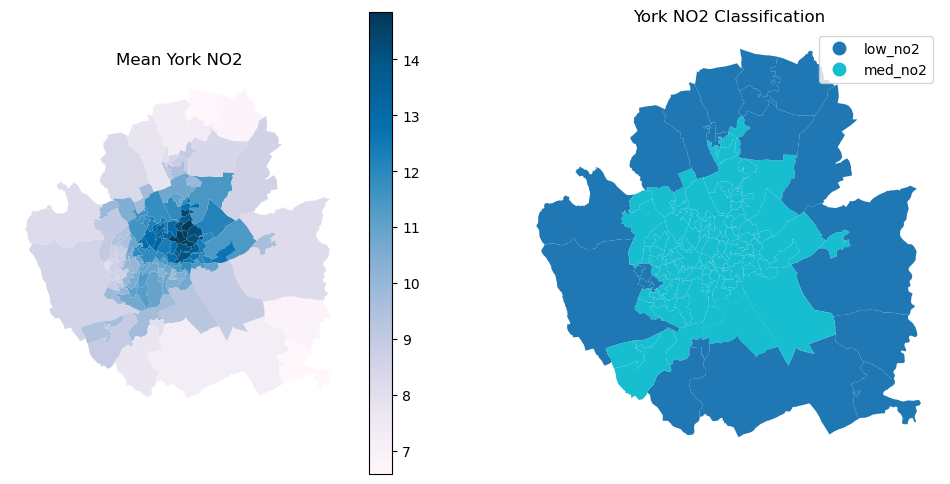

In [72]:
# Now we can plot a map visualising the nitrogen dioxide levels and accompanying classification in York

# Create a figure with two subplots
f, ax = plt.subplots(1,2, figsize=(12, 6))

# Plot the mean_no2 in subplot 1
spatialyorkahah.plot(ax=ax[0], column='mean_no2', cmap='PuBu', legend=True)

# Plot no2_level in subplot 2
spatialyorkahah.plot(ax=ax[1], column='no2_level', legend=True)

# Give subplot 1 an informative title
ax[0].set_title('Mean York NO2')

# Give subplot 2 an informative title
ax[1].set_title('York NO2 Classification')

# Make axis invisivle for subplot 1
ax[0].set_axis_off()

# Make axis invisible for subplot 2
ax[1].set_axis_off()

# Show the map
plt.show()

### York NO2 Level

The below subplots were created having investigated factors related to York's air quality. The investigation followed the data science process whereby the appropriate packages were imported, open source data was read in, cleaned, modified and checked before statistical models were produced and data was visualised. The cleaning and modification stage involved removing unnecessary columns and renaming variables to aid readability in the final visualisations. The area was defined using government geoportal LSOA data <a href="#ref1">[5]</a> and the dimensions investigating York's air quality were sourced from CDRC's AHAH multi-dimensional index <a href="#ref1">[4]</a>. The aim of the investigation is to inform York's local authorities of the most important variable impacting York's air quality and provide a means to assess, monitor and compare York's situational context to the rest of the nation. 
The key variable 'mean NO2' was identified as having the largest correlation (0.92) with air quality through plotting all considered dimensions in a heatmap with clearly labelled correlation values. This informed the investigation and subsequent subplots through spotlighting the most relevant dimension for York's local authorities to be made aware of.

### Part 1 - Non Spatial Data Visualisation

A jointplot was used to visualise the relationship between air quality and NO2 levels in York. Both the air quality and NO2 dimensions are float datatypes which makes a jointplot an appropriate choice with a continuous scale. The suitability of the chart is further noted through the use of plotting bivariate data with the additional categorical variable (no2 level) displayed through the colour scheme. This further aids understanding as it allows the reader to contextualise the nitrogen dioxide levels based of national classifications identified within the previously created ahah2 summary statistics and confirmed on the government website <a href="#ref1">[6]</a>. 

The AHAH index is interpreted with larger scores representing areas that have poorer health-related environments <a href="#ref1">[1]</a>. There is a very clear strong positive correlation between the dependent (air quality total score) and the independent variable (nitrogen dioxide). As the air quality score increases, reflecting poorer air quality, the mean nitrogen dioxide levels increase. It is noted that York has a majority classification of medium nitrogen dioxide levels. This chart can be used by local authorities to stress the importance of monitoring and managing nitrogen dioxide levels in relation to York's air quality. The subplot was created to be easily understood by an audience with varying degrees of knowledge around statistical data visualisation techniques. The chart was also made accessible through the use of a colour blind palette to visualise the categorical variable 'no2 level'. 

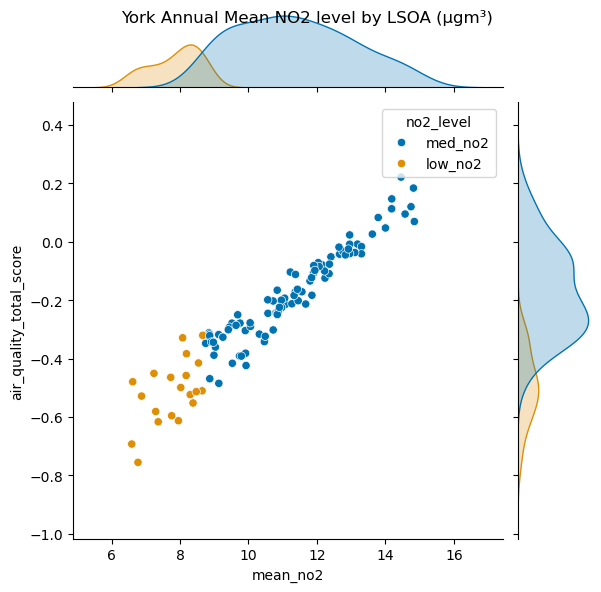

In [78]:
sns.jointplot(x='mean_no2',y='air_quality_total_score', hue='no2_level', palette='colorblind', data=yorkahah)

plt.suptitle("York Annual Mean NO2 level by LSOA (μgm³)");

### Part 2 - York mean NO2 and classification spatial data visualisation

Working with vector data which uses co-ordinates to indicate a physical location, a map was created to visualise the mean degree of nitrogen dioxide levels measured across York. A secondary map was created to place York's nitrogen dioxide levels within a national classification for comparison. The basemap was defined based on polygon data from the UK data service <a href="#ref1">[3]</a> where the first map was made accessible through the used a sequential colour palette to represent increasing integer nitrogen dioxide levels using CDRC's AHAH index <a href="#ref1">[4]</a>. This use of a sequential colour palette should aid those with colour impairments in reading the map as the increase in hues represent the increasing NO2 levels. As expected, mean levels of NO2 increase closer to the city centre whilst the accompanying classification map informs the audience that these are still medium NO2 levels in relation to the rest of the UK. This map can provide a basis for monitoring NO2 levels within LSOA's so that York's local authorities can make informed infrastructure decisions based on NO2 levels, identify problem areas, take action should levels change or provide additional services/resources to areas of concern etc. 

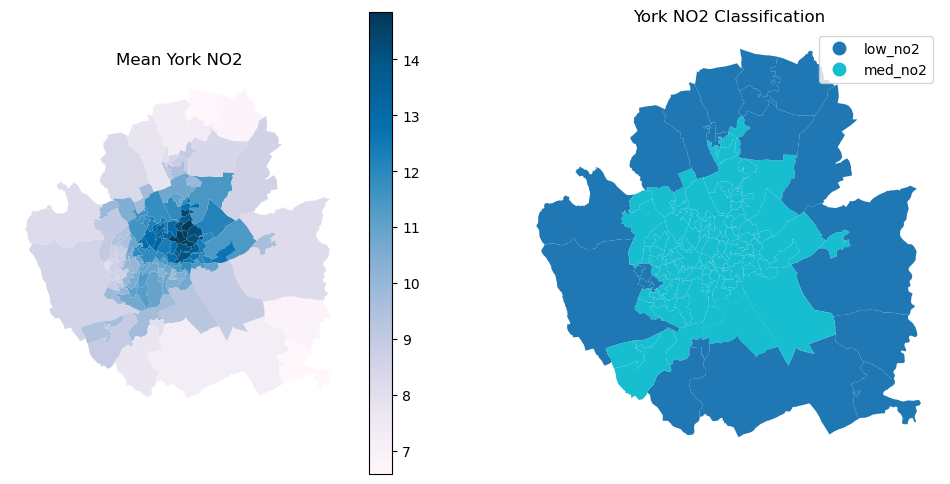

In [74]:
f, ax = plt.subplots(1,2, figsize=(12, 6))

spatialyorkahah.plot(ax=ax[0], column='mean_no2', cmap='PuBu', legend=True)

spatialyorkahah.plot(ax=ax[1], column='no2_level', legend=True)

ax[0].set_title('Mean York NO2')

ax[1].set_title('York NO2 Classification')

ax[0].set_axis_off()

ax[1].set_axis_off()
plt.show()

## References
<p><a href="add_url_here">[1]</a> Green, M.A. et al. (2018) ‘Developing an openly accessible multi-dimensional small area index of “access to healthy assets and hazards” for Great Britain, 2016’, Health &amp;amp; Place, 54, pp. 11–19. doi:10.1016/j.healthplace.2018.08.019. </p>
<p><a href="https://epsg.io/27700">[2]</a> EPSG CRS Check</p>
<p><a href="https://borders.ukdataservice.ac.uk/easy_download_data.html?data=England_lsoa_2011">[3]</a> UK Data Service 2011 LSOA file access </p>
<p><a href="https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah">[4]</a> AHAH Access to Health Assets and Hazards a "a multi-dimensional index developed by the CDRC for Great Britain measuring how ‘healthy’ neighbourhoods are. </p>
<p><a href="https://geoportal.statistics.gov.uk/datasets/ons::local-authority-district-2011-to-local-authority-district-2021-lookup-for-england-and-wales/explore">[5]</a> England LSOA data</p>
<p><a href="https://www.gov.uk/government/statistics/air-quality-statistics/ntrogen-dioxide#:~:text=The%20annual%20mean%20concentration%20of%20NO2%20at%20urban%20background%20sites,%C2%B5g%2Fm3%20each%20year.">[6]</a>Government Nitrogen Dioxide Statistics</p>